In [1]:
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report,confusion_matrix

In [2]:
mipath = "australian.dat"
data = pd.read_csv(mipath, sep=" ",header=None)
data.columns = ["A1","A2","A3","A4","A5","A6","A7","A8","A9","A10","A11","A12","A13","A14","class"]
data.head(5)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,class
0,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 690 entries, 0 to 689
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A1      690 non-null    int64  
 1   A2      690 non-null    float64
 2   A3      690 non-null    float64
 3   A4      690 non-null    int64  
 4   A5      690 non-null    int64  
 5   A6      690 non-null    int64  
 6   A7      690 non-null    float64
 7   A8      690 non-null    int64  
 8   A9      690 non-null    int64  
 9   A10     690 non-null    int64  
 10  A11     690 non-null    int64  
 11  A12     690 non-null    int64  
 12  A13     690 non-null    int64  
 13  A14     690 non-null    int64  
 14  class   690 non-null    int64  
dtypes: float64(3), int64(12)
memory usage: 81.0 KB


In [4]:
#Particiones
X=data.iloc[:,:-1]#todas las lineas,todas las columnas, menos la ultima
y=data[["class"]]#solo class


In [5]:
#verificar si esta balanceado el conjunto de datos
print("Total de datos: ",y.shape[0])
print("Total de datos de la clase positiva: ",sum(y["class"]))
print("Porcentaje de datos de la clase positiva (1): %.1f%%" %(100*sum(y["class"])/y.shape[0]) )
print("Porcentaje de datos de la clase positiva (1): %.1f%%" %(100*(1-sum(y["class"])/y.shape[0])) )

Total de datos:  690
Total de datos de la clase positiva:  307
Porcentaje de datos de la clase positiva (1): 44.5%
Porcentaje de datos de la clase positiva (1): 55.5%


In [6]:
#Variables de entrenamiento y testeo
X_train,X_test,y_train,y_test = train_test_split(X, y, train_size=0.6,random_state=45)

In [7]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(414, 14)
(414, 1)
(276, 14)
(276, 1)


In [8]:
#arbol de decision
#importar libreria
from sklearn.tree import DecisionTreeClassifier
#crear instancia
dtc = DecisionTreeClassifier()
#entrenamiento
dtc.fit(X_train, y_train)
#score
dtc.score(X_test,y_test)


0.8369565217391305

Vamos a modificar los hiperparamentos
criterion: mide la calidad de la divison de cada nodo
max_depth: maxima profundidad de expansion del arbol
min_samples_split: minimo de datos en un nodo antes de hacer la division

In [9]:
#crear instancia
dtc = DecisionTreeClassifier(criterion="entropy",max_depth=15,min_samples_split=8)
#entrenamiento
dtc.fit(X_train, y_train)
#score
dtc.score(X_test,y_test)

0.8731884057971014

Árbol de Decisión con párametros por default 
 Promedio y desviación estándar: 82.8% (0.8)


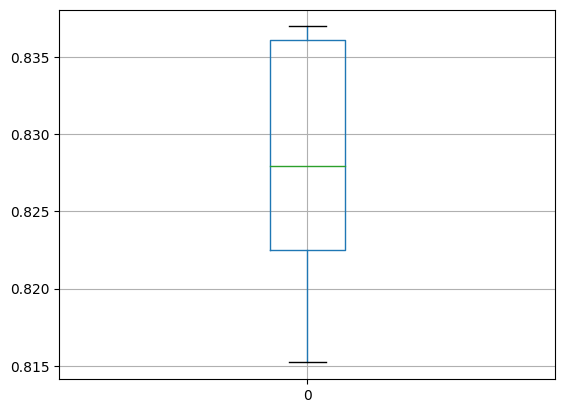

In [16]:
n_for = 10
accAD = list()

for k in range(n_for):
    
    modelo_AD = DecisionTreeClassifier()

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD.append(tmp)

print('Árbol de Decisión con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD),100*np.std(accAD)))

pd.DataFrame(accAD).boxplot()
plt.show()

In [17]:
accAD

[0.8369565217391305,
 0.822463768115942,
 0.8297101449275363,
 0.8333333333333334,
 0.8369565217391305,
 0.8152173913043478,
 0.8188405797101449,
 0.822463768115942,
 0.8260869565217391,
 0.8369565217391305]

Árbol de Decisión con párametros por default 
 Promedio y desviación estándar: 86.6% (0.0)


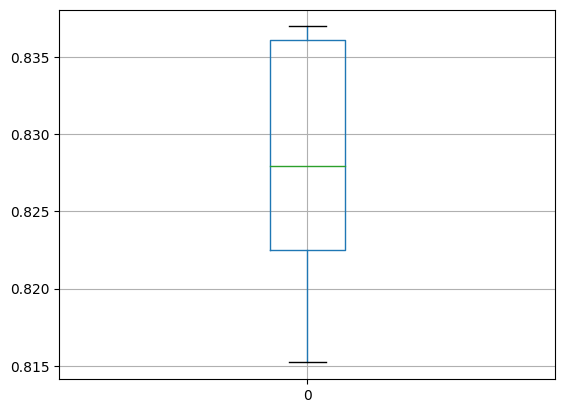

In [19]:
accAD2 = list()

for k in range(n_for):
    
    modelo_AD = DecisionTreeClassifier(criterion="entropy",
                                       max_depth=10,
                                       min_samples_split=0.1,
                                       min_samples_leaf=0.01)

    modelo_AD.fit(X_train,y_train)
    tmp = modelo_AD.score(X_test,y_test)
    accAD2.append(tmp)

print('Árbol de Decisión con párametros por default \n Promedio y desviación estándar: %.1f%% (%.1f)'% (100*np.mean(accAD2),100*np.std(accAD2)))

pd.DataFrame(accAD).boxplot()
plt.show()

In [20]:
accAD2

[0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072,
 0.8659420289855072]

In [21]:
ddff = pd.DataFrame(list(zip(accAD,accAD2)),columns=["default","ajustado"])
ddff

,default,ajustado
0,0.836957,0.865942
1,0.822464,0.865942
2,0.829710,0.865942
3,0.833333,0.865942
4,0.836957,0.865942
5,0.815217,0.865942
6,0.818841,0.865942
7,0.822464,0.865942
8,0.826087,0.865942
9,0.836957,0.865942


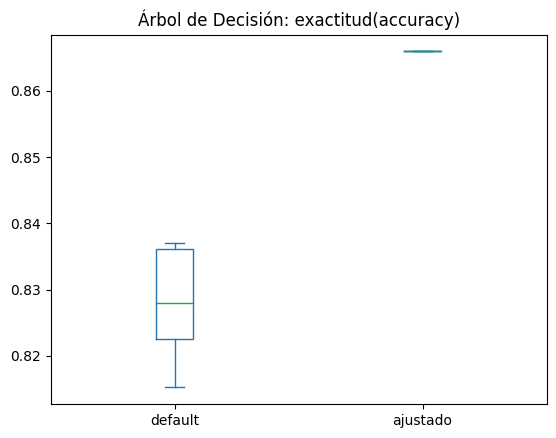

In [23]:
ddff.plot(kind='box')
plt.title('Árbol de Decisión: exactitud(accuracy)')
plt.show()

#Random Forest (Bosque Aleatorio)